In [1]:
from biglearn import createNewPred as CP
from biglearn import analyserML as ML
from alys import regression as alysCL
from alys import  save as SV
from graph import rViz 

from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import csv

# Preparation des Datas

In [2]:
###### Renomer la colonne note par target avant de commencer
df_base = read_csv('Base_Files/movies.csv', index_col=0)

In [3]:
df_base.sample(3)

,title,synopsis,rating,genre,prod_budget,marketing_budget,duration,release_date,director,people,produceur,target,box_office
id,,,,,,,,,,,,,
5042,Strangers: Prey at Night,A family of four staying at a secluded mobile ...,-12,Horror,5000000,NaN,85,2018-04-18,Johannes Roberts,"Christina Hendricks, Martin Henderson, Bailee ...",Aviron Pictures,5.2,31039100
3637,Crocodile Dundee III,"Australian Outback adventurer Mick ""Crocodile""...",TP,"Adventure, Comedy, Crime",21150000,NaN,92,2001-06-27,Simon Wincer,"Paul Hogan, Linda Kozlowski, Jere Burns, Jonat...",Paramount,4.8,39438700
12,Le seigneur des anneaux: Les deux tours,While Frodo and Sam edge closer to Mordor with...,TP,"Adventure, Drama, Fantasy",94000000,NaN,179,2002-12-18,Peter Jackson,"Bruce Allpress, Sean Astin, John Bach, Sala Baker",New Line Cinema,8.7,927601000


In [4]:
df_base = df_base.drop(columns='marketing_budget') # colonne non renseignée
df_base = df_base.drop(columns='box_office') # On est pas sensé conaitre cette donée au moment de la prediction
df_base.sample(3)

,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,target
id,,,,,,,,,,,
110,Happiness Therapy,"After a stint in a mental institution, former ...",TP,"Comedy, Drama, Romance",21000000,122,2013-01-30,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",The Weinstein Company,7.7
3465,Un tueur pour cible,A troubled hitman seeks aid from a forger to h...,-12,"Action, Crime, Thriller",30000000,87,1998-05-27,Antoine Fuqua,"Yun-Fat Chow, Mira Sorvino, Michael Rooker, Ke...",Sony Pictures Home Entertainment,6.2
4007,Feu de glace,A woman faces deadly consequences for abandoni...,TP,"Drama, Mystery, Romance, Thriller",25000000,100,2002-06-05,Kaige Chen,"Heather Graham, Joseph Fiennes, Natascha McElh...",MGM,5.5


In [5]:
df_base.shape

(5081, 11)

In [6]:
#Dans le dossier Rapport
SV.extraction(df_base)

nom du fichier.ex : moviesV.csv
Extraction commencé
Extraction terminé


# Création du modèle

In [8]:
CP.newDataSet()

Nom du fichier full train : moviesV.csv
valeur split train : 0.7
valeur split test : 0.3
Model selectioné : deepnet
Nom du champs objectif : target
Nom du fichier exporté : Ml_pred1.csv
split ok
predict-lancée
prediction ok


In [11]:
df_pred = read_csv("Pred_Files/ml_pred1.csv")

# Analyse de la prédiction

In [12]:
alysCL.regr(df_pred)
df_pred.sample(5)

nom colonne prediction : pred
nom colonne output : target
MAPE =  8.05


,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week,target,pred,pourcerror,errorabs,mape
1295,L'insulte,After an emotional exchange between a Lebanese...,TP,"Crime, Drama, Thriller",3000000,113,2018-01-31,Ziad Doueiri,"Adel Karam, Kamel El Basha, Camille Salameh, D...",NaN,2018,1,31,3,7.7,6.88235,-0.106188,0.11,NaN
617,Star trek: Générations,With the help of long presumed dead Captain Ki...,TP,"Action, Adventure, Mystery, Sci-Fi, Thriller",35000000,118,1995-03-29,David Carson,"Patrick Stewart, Jonathan Frakes, Brent Spiner...",Paramount Pictures,1995,3,29,3,6.6,6.88320,0.042909,0.04,NaN
1221,Almost Heroes,A road comedy about 2 guys whose mission is to...,-12,"Adventure, Comedy, Western",30000000,90,1998-05-29,Christopher Guest,"Chris Farley, Matthew Perry, Bokeem Woodbine, ...",Warner Home Video,1998,5,29,5,5.9,5.90360,0.000610,0.00,NaN
462,Little Children,The lives of two lovelorn spouses from separat...,TP,"Drama, Romance",26000000,136,2007-01-24,Todd Field,"Kate Winslet, Jennifer Connelly, Patrick Wilso...",New Line Cinema,2007,1,24,3,7.5,7.63211,0.017615,0.02,NaN
105,Bruce tout-puissant,A guy who complains about God too often is giv...,TP,"Comedy, Drama, Fantasy",81000000,101,2003-09-03,Tom Shadyac,"Jim Carrey, Morgan Freeman, Jennifer Aniston, ...",Universal Pictures,2003,9,3,3,6.7,6.78943,0.013348,0.01,NaN


In [13]:
alysCL.posneg(df_pred)

On a 791 erreurs positive, 733 erreurs negative, 0 prediction parfaite


,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,...,release_date.day-of-month,release_date.day-of-week,target,pred,pourcerror,errorabs,mape,positive erreur,negatif erreur,prediction parfaite
0,Matrix,A computer hacker learns from mysterious rebel...,TP,"Action, Sci-Fi",63000000,136,1999-06-23,Lana Wachowski,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",Warner Bros. Pictures,...,23,3,8.7,7.18528,-0.174106,0.17,8.05,791.0,733.0,0.0
1,Le parrain,The aging patriarch of an organized crime dyna...,-12,"Crime, Drama",6000000,175,1972-10-18,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",Paramount Pictures,...,18,3,9.2,8.64327,-0.060514,0.06,NaN,NaN,NaN,NaN
2,Le seigneur des anneaux: Les deux tours,While Frodo and Sam edge closer to Mordor with...,TP,"Adventure, Drama, Fantasy",94000000,179,2002-12-18,Peter Jackson,"Bruce Allpress, Sean Astin, John Bach, Sala Baker",New Line Cinema,...,18,3,8.7,7.90480,-0.091402,0.09,NaN,NaN,NaN,NaN
3,Interstellar,A team of explorers travel through a wormhole ...,TP,"Adventure, Drama, Sci-Fi",165000000,169,2014-11-05,Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",Paramount Pictures,...,5,3,8.6,8.21052,-0.045288,0.05,NaN,NaN,NaN,NaN
4,Avengers,Earth's mightiest heroes must come together an...,TP,"Action, Adventure, Sci-Fi",220000000,143,2012-04-25,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Walt Disney Pictures,...,25,3,8.0,7.34831,-0.081461,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,Silmido,Based on a true story of 1968 Korean Republic ...,TP,"Action, Drama",8000000,135,2003-12-24,See full summary,"Sung-Ki Ahn, Kyung-gu Sol, Jun-ho Heo, Jae-yeo...",Cinema Service,...,24,3,7.1,7.01403,-0.012108,0.01,NaN,NaN,NaN,NaN
1520,Partir,"Suzanne is a well married mother, but her bour...",TP,"Drama, Romance",7600000,85,2009-08-12,Catherine Corsini,"Kristin Scott Thomas, Sergi López, Yvan Attal,...",IFC Films,...,12,3,6.2,6.21565,0.002524,0.00,NaN,NaN,NaN,NaN
1521,Whipped,"Three egotistical swingers, who think they're ...",-12,"Comedy, Romance",3000000,82,2000-09-01,Peter M. Cohen,"Amanda Peet, Brian Van Holt, Jonathan Abrahams...",Destination Films,...,1,5,4.5,5.32184,0.182631,0.18,NaN,NaN,NaN,NaN
1522,The Mother,A woman has a passionate affair with a man hal...,TP,"Drama, Romance",2500000,112,2004-03-10,Roger Michell,"Anne Reid, Peter Vaughan, Anna Wilson-Jones, D...",Sony Pictures Classics,...,10,3,6.7,6.86049,0.023954,0.02,NaN,NaN,NaN,NaN


model ID : deepnet/5de90f0ae47684675c000014
model name : deepnet


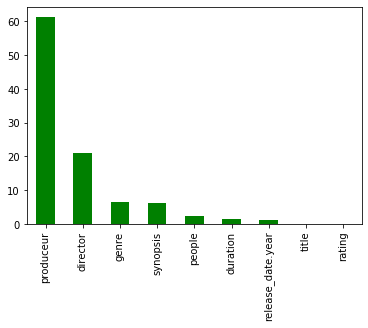

In [14]:
ML.summuary()

In [15]:
df_pred.sort_values("errorabs", axis = 0, ascending = False)

,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,...,release_date.day-of-month,release_date.day-of-week,target,pred,pourcerror,errorabs,mape,positive erreur,negatif erreur,prediction parfaite
764,Le fils du mask,"Tim Avery, an aspiring cartoonist, finds himse...",TP,"Comedy, Family, Fantasy",84000000,94,2005-03-23,Lawrence Guterman,"Jamie Kennedy, Alan Cumming, Liam Falconer, Ry...",New Line Cinema,...,23,3,2.2,6.19335,1.815159,1.82,NaN,NaN,NaN,NaN
1186,Pledge This: Panique à la fac!,"At South Beach University, a beautiful sororit...",TP,Comedy,8300000,91,2007-02-08,William Heins,"Paris Hilton, Paula Garcés, Sarah Carter, Simo...",Freestyle Releasing,...,8,4,1.8,4.66892,1.593844,1.59,NaN,NaN,NaN,NaN
1032,From Justin to Kelly,A waitress from Texas and a college student fr...,TP,"Comedy, Musical, Romance",12000000,81,2003-06-20,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",20th Century Fox,...,20,5,2.1,5.37499,1.559519,1.56,NaN,NaN,NaN,NaN
1098,Glitter,A young singer dates a disc jockey who helps h...,TP,"Drama, Music, Romance",22000000,104,2002-02-06,Vondie Curtis-Hall,"Mariah Carey, Max Beesley, Da Brat, Tia Texada",20th Century Fox,...,6,3,2.2,5.55845,1.526568,1.53,NaN,NaN,NaN,NaN
804,Amours troubles,Larry Gigli is assigned by a crime boss to kid...,TP,"Comedy, Crime, Romance",54000000,121,2003-11-12,Martin Brest,"Ben Affleck, Terry Camilleri, David Backus, Le...",NaN,...,12,3,2.5,5.61775,1.247100,1.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,La guerre selon Charlie Wilson,A drama based on a Texas congressman Charlie W...,TP,"Biography, Comedy, Drama, History",75000000,102,2008-01-16,Mike Nichols,"Tom Hanks, Amy Adams, Julia Roberts, Philip Se...",Universal Pictures,...,16,3,7.0,7.00021,0.000030,0.00,NaN,NaN,NaN,NaN
836,Proof,The daughter of a brilliant but mentally distu...,TP,"Drama, Mystery",20000000,100,2005-10-07,John Madden,"Gwyneth Paltrow, Anthony Hopkins, Jake Gyllenh...",Miramax Films,...,7,5,6.7,6.71559,0.002327,0.00,NaN,NaN,NaN,NaN
474,À vif!,Adam Jones (Bradley Cooper) is a chef who dest...,TP,"Comedy, Drama",20000000,101,2015-11-04,Bradley Cooper,"Bradley Cooper, Sienna Miller, Daniel Brühl, R...",The Weinstein Company,...,4,3,6.6,6.62632,0.003988,0.00,NaN,NaN,NaN,NaN
1239,Daddy Cool,A father struggling with bipolar disorder trie...,-12,"Comedy, Drama, Romance",6700000,90,2015-07-08,Maya Forbes,"Mark Ruffalo, Zoe Saldana, Imogene Wolodarsky,...",Sony Pictures Classics,...,8,3,7.0,6.99733,-0.000381,0.00,NaN,NaN,NaN,NaN


In [16]:
alysCL.seuil_vs_error(df_pred)

valeur du seuil :0.2
il y'a 1413 erreurs inférieurs à 0.2, il y'a 111 erreurs supérieurs à 0.2
erreur sous seuil = 92.7165%


92.7165

In [17]:
alysCL.seuil_vs_error(df_pred)

valeur du seuil :0.1
il y'a 1139 erreurs inférieurs à 0.1, il y'a 385 erreurs supérieurs à 0.1
erreur sous seuil = 74.7375%


74.7375

# Comparaison performance avec un modèle ensemble

In [3]:
CP.loaddDataSet()

Appliquer nouveau split (true or false) ?
train dataset/id : dataset/5de90efbe476846765000413
test dataset/id : dataset/5de90efc7811dd6e9e000362
Model selectioné : ensemble
Nom du champs objectif : target
Nom du fichier exporté : ML-pred2.csv
dataset load ok
predict-lancée
prediction ok


In [7]:
df_pred = read_csv("Pred_Files/ML-pred2.csv")

In [8]:
alysCL.regr(df_pred)
df_pred.sample(5)

nom colonne prediction : pred
nom colonne output : target
MAPE =  7.99


,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week,target,pred,pourcerror,errorabs,mape
231,Divergente 2: L'insurrection,Beatrice Prior must confront her inner demons ...,-16,"Action, Adventure, Sci-Fi, Thriller",110000000,119,2015-03-18,Robert Schwentke,"Kate Winslet, Jai Courtney, Mekhi Phifer, Shai...",Lionsgate Films,2015,3,18,3,6.2,6.58569,0.062208,0.06,NaN
763,Macbeth,"Macbeth, the Thane of Glamis, receives a proph...",TP,"Drama, History, War",15000000,113,2015-11-18,Justin Kurzel,"Jack Madigan, Frank Madigan, Michael Fassbende...",The Weinstein Company,2015,11,18,3,6.6,6.59909,-0.000138,0.00,NaN
172,Du sang et des larmes,Marcus Luttrell and his team set out on a miss...,-12,"Action, Biography, Drama, War",40000000,121,2014-01-01,Peter Berg,"Mark Wahlberg, Taylor Kitsch, Emile Hirsch, Be...",Universal Studios,2014,1,1,3,7.5,6.90348,-0.079536,0.08,NaN
877,"Buffy, tueuse de vampires",A flighty teenage girl learns that she is her ...,TP,"Action, Comedy, Fantasy, Horror",7000000,86,1992-07-31,Fran Rubel Kuzui,"Kristy Swanson, Donald Sutherland, Paul Reuben...",20th Century Fox,1992,7,31,5,5.6,5.70514,0.018775,0.02,NaN
177,"Mon beau-père, mes parents et moi",All hell breaks loose when the Byrnes family m...,TP,"Comedy, Romance",80000000,115,2005-02-16,Jay Roach,"Robert De Niro, Ben Stiller, Dustin Hoffman, B...",Universal Pictures,2005,2,16,3,6.3,6.38912,0.014146,0.01,NaN


In [9]:
alysCL.posneg(df_pred)

On a 762 erreurs positive, 762 erreurs negative, 0 prediction parfaite


,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,...,release_date.day-of-month,release_date.day-of-week,target,pred,pourcerror,errorabs,mape,positive erreur,negatif erreur,prediction parfaite
0,Matrix,A computer hacker learns from mysterious rebel...,TP,"Action, Sci-Fi",63000000,136,1999-06-23,Lana Wachowski,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",Warner Bros. Pictures,...,23,3,8.7,7.93689,-0.087714,0.09,7.99,762.0,762.0,0.0
1,Le parrain,The aging patriarch of an organized crime dyna...,-12,"Crime, Drama",6000000,175,1972-10-18,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",Paramount Pictures,...,18,3,9.2,8.05837,-0.124090,0.12,NaN,NaN,NaN,NaN
2,Le seigneur des anneaux: Les deux tours,While Frodo and Sam edge closer to Mordor with...,TP,"Adventure, Drama, Fantasy",94000000,179,2002-12-18,Peter Jackson,"Bruce Allpress, Sean Astin, John Bach, Sala Baker",New Line Cinema,...,18,3,8.7,8.14880,-0.063356,0.06,NaN,NaN,NaN,NaN
3,Interstellar,A team of explorers travel through a wormhole ...,TP,"Adventure, Drama, Sci-Fi",165000000,169,2014-11-05,Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",Paramount Pictures,...,5,3,8.6,8.24424,-0.041367,0.04,NaN,NaN,NaN,NaN
4,Avengers,Earth's mightiest heroes must come together an...,TP,"Action, Adventure, Sci-Fi",220000000,143,2012-04-25,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Walt Disney Pictures,...,25,3,8.0,7.47388,-0.065765,0.07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,Silmido,Based on a true story of 1968 Korean Republic ...,TP,"Action, Drama",8000000,135,2003-12-24,See full summary,"Sung-Ki Ahn, Kyung-gu Sol, Jun-ho Heo, Jae-yeo...",Cinema Service,...,24,3,7.1,7.16834,0.009625,0.01,NaN,NaN,NaN,NaN
1520,Partir,"Suzanne is a well married mother, but her bour...",TP,"Drama, Romance",7600000,85,2009-08-12,Catherine Corsini,"Kristin Scott Thomas, Sergi López, Yvan Attal,...",IFC Films,...,12,3,6.2,6.53172,0.053503,0.05,NaN,NaN,NaN,NaN
1521,Whipped,"Three egotistical swingers, who think they're ...",-12,"Comedy, Romance",3000000,82,2000-09-01,Peter M. Cohen,"Amanda Peet, Brian Van Holt, Jonathan Abrahams...",Destination Films,...,1,5,4.5,6.10084,0.355742,0.36,NaN,NaN,NaN,NaN
1522,The Mother,A woman has a passionate affair with a man hal...,TP,"Drama, Romance",2500000,112,2004-03-10,Roger Michell,"Anne Reid, Peter Vaughan, Anna Wilson-Jones, D...",Sony Pictures Classics,...,10,3,6.7,7.11475,0.061903,0.06,NaN,NaN,NaN,NaN


model ID : ensemble/5dea3c057811dd6e9e000cc6
model name : ensemble


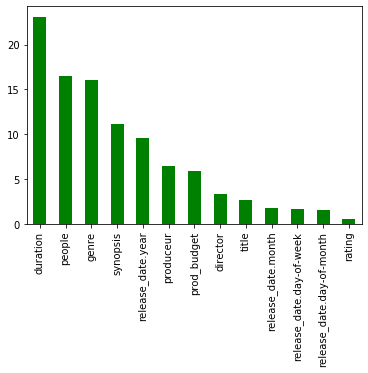

In [10]:
ML.summuary()

In [11]:
df_pred.sort_values("errorabs", axis = 0, ascending = False)

,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,...,release_date.day-of-month,release_date.day-of-week,target,pred,pourcerror,errorabs,mape,positive erreur,negatif erreur,prediction parfaite
1032,From Justin to Kelly,A waitress from Texas and a college student fr...,TP,"Comedy, Musical, Romance",12000000,81,2003-06-20,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",20th Century Fox,...,20,5,2.1,5.42462,1.583152,1.58,NaN,NaN,NaN,NaN
821,King Rising - Au nom du Roi,A man named Farmer sets out to rescue his kidn...,TP,"Action, Adventure, Fantasy, Horror, Thriller, War",60000000,127,2007-11-29,Uwe Boll,"Jason Statham, Leelee Sobieski, John Rhys-Davi...",Freestyle Releasing,...,29,4,3.8,6.92730,0.822974,0.82,NaN,NaN,NaN,NaN
1186,Pledge This: Panique à la fac!,"At South Beach University, a beautiful sororit...",TP,Comedy,8300000,91,2007-02-08,William Heins,"Paris Hilton, Paula Garcés, Sarah Carter, Simo...",Freestyle Releasing,...,8,4,1.8,3.05343,0.696350,0.70,NaN,NaN,NaN,NaN
764,Le fils du mask,"Tim Avery, an aspiring cartoonist, finds himse...",TP,"Comedy, Family, Fantasy",84000000,94,2005-03-23,Lawrence Guterman,"Jamie Kennedy, Alan Cumming, Liam Falconer, Ry...",New Line Cinema,...,23,3,2.2,3.67352,0.669782,0.67,NaN,NaN,NaN,NaN
806,Mords-moi sans hésitation,"A spoof of vampire-themed movies. Teenager, Be...",TP,Comedy,20000000,82,2010-11-24,Jason Friedberg,"Jenn Proske, Matt Lanter, Diedrich Bader, Chri...",20th Century Fox,...,24,3,3.4,5.68048,0.670729,0.67,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,Mary Poppins,"In turn of the century London, a magical nanny...",TP,"Comedy, Family, Fantasy, Musical",6000000,139,1965-02-09,Robert Stevenson,"Julie Andrews, Dick Van Dyke, David Tomlinson,...",Walt Disney Productions,...,9,2,7.8,7.81030,0.001321,0.00,NaN,NaN,NaN,NaN
72,Gatsby le magnifique,"A writer and wall street trader, Nick, finds h...",TP,"Drama, Romance",105000000,143,2013-05-15,Baz Luhrmann,"Lisa Adam, Frank Aldridge, Amitabh Bachchan, S...",Warner Bros. Pictures,...,15,3,7.3,7.27472,-0.003463,0.00,NaN,NaN,NaN,NaN
1258,Ben Is Back,A drug addicted teenage boy shows up unexpecte...,TP,Drama,13000000,103,2019-01-16,Peter Hedges,"Julia Roberts, Lucas Hedges, Courtney B. Vance...",LD Entertainment/Lionsgate/Roadside Attractions,...,16,3,6.7,6.68386,-0.002409,0.00,NaN,NaN,NaN,NaN
637,Sunshine Cleaning,In order to raise the tuition to send her youn...,TP,"Comedy, Drama",8000000,91,2009-06-10,Christine Jeffs,"Amy Adams, Emily Blunt, Alan Arkin, Jason Spevack",Overture Films,...,10,3,6.8,6.82047,0.003010,0.00,NaN,NaN,NaN,NaN


In [12]:
alysCL.seuil_vs_error(df_pred)

valeur du seuil :0.2
il y'a 1429 erreurs inférieurs à 0.2, il y'a 95 erreurs supérieurs à 0.2
erreur sous seuil = 93.7664%


93.7664

In [13]:
alysCL.seuil_vs_error(df_pred)

valeur du seuil :0.1
il y'a 1110 erreurs inférieurs à 0.1, il y'a 414 erreurs supérieurs à 0.1
erreur sous seuil = 72.8346%


72.8346